<ipython-input-5-4b51956af70a>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


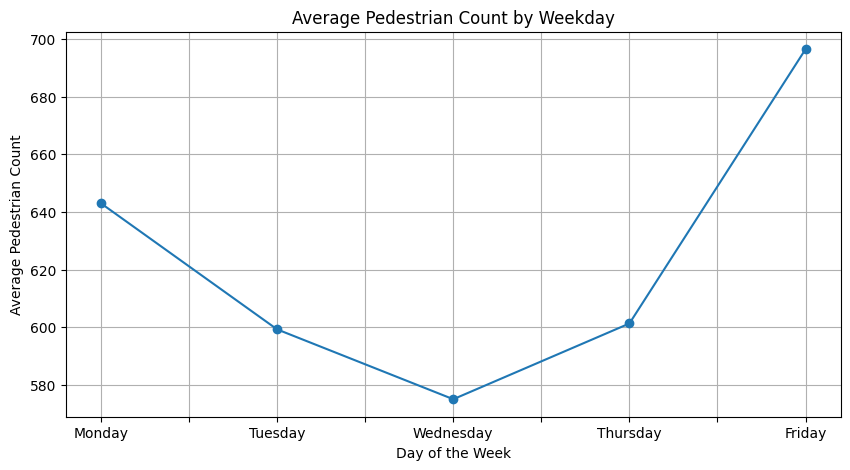

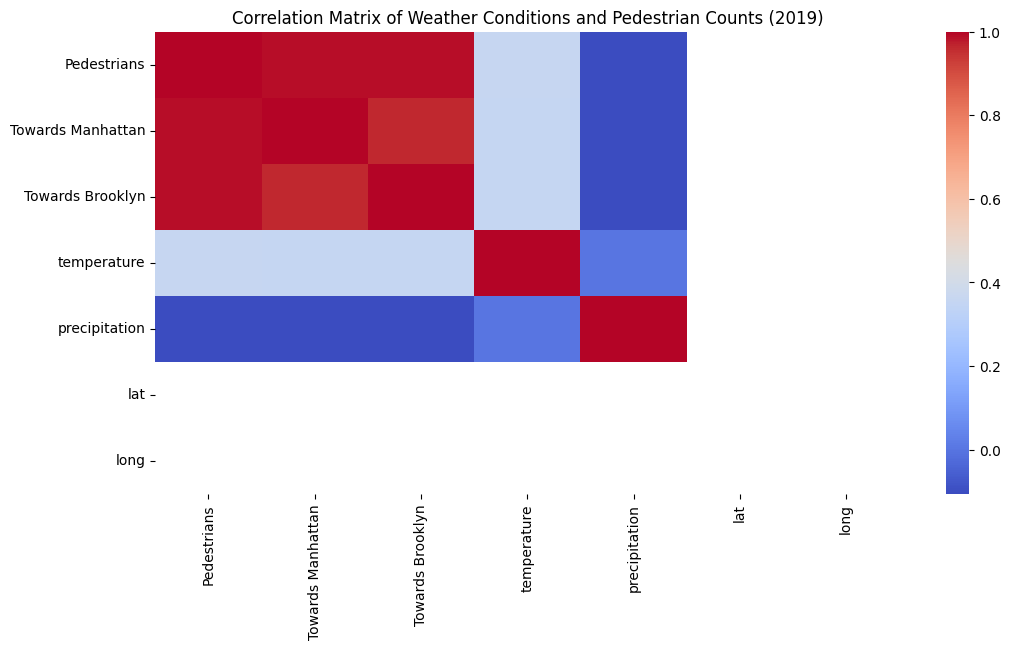

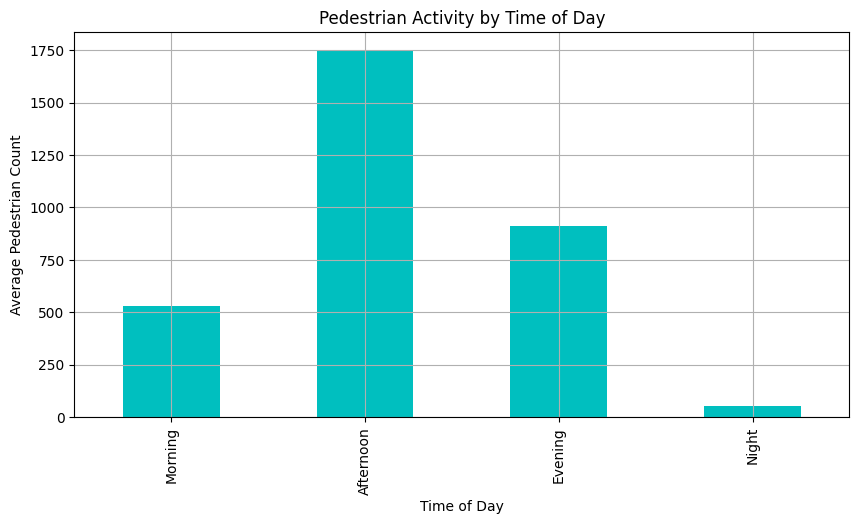

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert hour_beginning to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Task 1: Filter for weekdays and plot pedestrian counts
df['Day_of_Week'] = df['hour_beginning'].dt.day_name()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['Day_of_Week'].isin(weekdays)]

plt.figure(figsize=(10, 5))
df_weekdays.groupby('Day_of_Week')['Pedestrians'].mean().reindex(weekdays).plot(kind='line', marker='o')
plt.xlabel("Day of the Week")
plt.ylabel("Average Pedestrian Count")
plt.title("Average Pedestrian Count by Weekday")
plt.grid()
plt.show()

# Task 2: Analyze Brooklyn Bridge pedestrian counts in 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# One-hot encode the 'weather_summary' column
weather_encoded = pd.get_dummies(df_2019['weather_summary'])
df_2019_encoded = pd.concat([df_2019, weather_encoded], axis=1)

# Drop non-numeric columns before computing correlation matrix
df_2019_numeric = df_2019_encoded.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_2019_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Weather Conditions and Pedestrian Counts (2019)")
plt.show()

# Task 3: Categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Extract hour and categorize
df['Hour'] = df['hour_beginning'].dt.hour
df['Time_of_Day'] = df['Hour'].apply(categorize_time_of_day)

# Analyze pedestrian activity based on time of day
plt.figure(figsize=(10, 5))
df.groupby('Time_of_Day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night']).plot(kind='bar', color='c')
plt.xlabel("Time of Day")
plt.ylabel("Average Pedestrian Count")
plt.title("Pedestrian Activity by Time of Day")
plt.grid()
plt.show()
